Task List 4
=================
Bayesian concept learning
----------------------

**Knowledge & Skills:**
* likelihood
* apriori
* aposteriori
* maximum likelihood estimate
* maximum aposteriori estimate

Number game rules:
* program takes number(numbers) and prints selected hypothesis using apropriate method
* numbers are in range [1-500] (inclusive)
* hypothesis space : odd numbers, even numbers, arithmetic sequences ([2,4,6,8,10,12,...], [3,6,9,12,15,...], ..., [40,80,120,160,...], ...)

Libraries
----------------

In [71]:
from collections import OrderedDict
from operator import itemgetter 
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

Example Numbers
----------------

In [72]:
numbers_to_check = [
    [1, 3, 5, 7, 9],
    [2, 4, 6, 8, 10],
    [2, 4, 8, 64, 16, 128, 256],
    [2, 4, 8, 32, 64, 128, 256]
]

Prior Probability
----------------

In [73]:
prior_probability = [7, 70000000, 6, 7, 7, 5, 1]
sum_probability = sum(prior_probability)
for i, item in enumerate(prior_probability):
    prior_probability[i] = item / sum_probability

print(prior_probability)

[9.999995285716508e-08, 0.9999995285716509, 8.57142453061415e-08, 9.999995285716508e-08, 9.999995285716508e-08, 7.142853775511792e-08, 1.4285707551023583e-08]


Concepts
----------------

In [74]:
numbers = []
for i in range(1, 501):
    numbers.append(i)

concepts = {"odd_number": 
            [(lambda x: x % 2 == 1), 
             (len(list(filter(lambda x: x % 2 == 1, numbers)))),
            prior_probability[0]],
           "even_number": 
            [(lambda x: x % 2 == 0), 
             (len(list(filter(lambda x: x % 2 == 0, numbers)))),
            prior_probability[1]],
           "prime_number": 
            [(lambda x: all(x % i != 0 for i in range(int(x**0.5)+1)[2:])),
            (len(list(filter(lambda x: all(x % i != 0 for i in range(int(x**0.5)+1)[2:]), numbers)))),
            prior_probability[2]],
           "range_number": 
            [(lambda x: x >= 1 and x <= 100), 
            (len(list(filter(lambda x: x >= 1 and x <= 100, numbers)))),
            prior_probability[3]],
           "power_of_two": 
            [(lambda x: (any(x == 2**i for i in range(0, 9)) and x >= 1)), 
            (len(list(filter(lambda x: (any(x == 2**i for i in range(0, 9)) and x >= 1), numbers)))),
            prior_probability[4]],
           "power_of_three": 
            [(lambda x: (any(x == 3**i for i in range(0, 6)) and x >= 1)), 
            (len(list(filter(lambda x: (any(x == 3**i for i in range(0, 6)) and x >= 1), numbers)))),
            prior_probability[5]],
           "strange_number": 
            [(lambda x: (any(x == 2**i for i in range(0, 9)) and x >= 1) and x != 32), 
            (len(list(filter(lambda x: (any(x == 2**i for i in range(0, 9)) and x >= 1) and x != 32, numbers)))),
            prior_probability[6]]
           }

Number of elements in the concept
----------------

In [75]:
print("For range 1-500:")
for keys,values in concepts.items():
    print("\tThe number of {} is: {} ".format(keys, values[1]))    

For range 1-500:
	The number of odd_number is: 250 
	The number of even_number is: 250 
	The number of prime_number is: 96 
	The number of range_number is: 100 
	The number of power_of_two is: 9 
	The number of power_of_three is: 6 
	The number of strange_number is: 8 


Functions
=================

In [76]:
def is_compatible(lambda_function, numbers):
    is_compatible = True
    for i in numbers:
        if lambda_function(i) == False:
            is_compatible = False
            break
    return is_compatible

In [77]:
def count_likelihood(numbers, lambda_function):
    return (1/lambda_function)**len(numbers)

In [78]:
def count_posterior(value, probability):
    return value * probability

In [79]:
def count_if_possible(numbers, concept, results, name):
    likelihood = count_likelihood(numbers, concept[1])
    if is_compatible(concept[0], numbers) == True:
        results[name] = [likelihood, count_posterior(likelihood, concept[2])]
    else:
        results[name] = [0, 0]
    return results

In [80]:
def number_game(numbers):
    results = defaultdict(list)
    for (keys, values) in concepts.items():
        results = count_if_possible(numbers, values, results, keys)
    return results

Exercise 1
=================

**Implement a simple number game based only on the likelihood:**

* the program takes a number or an array of numbers
* print likelihood of each possible concept (satisfied by given number/numbers) sorted by likelihood

In [81]:
def number_game_likelihood_version(numbers):
    if type(numbers) == int:
        numbers = [numbers]
    result = number_game(numbers)
    print("Tested numbers: {} ".format(numbers))
    result = OrderedDict(sorted(result.items(), key=lambda elem: elem[1][0], reverse = True))
    for keys,values in result.items():
        if values[0] != 0:
            print("\t{}: {}".format(keys, values[0]))

In [82]:
number_game_likelihood_version(2)

Tested numbers: [2] 
	strange_number: 0.125
	power_of_two: 0.1111111111111111
	prime_number: 0.010416666666666666
	range_number: 0.01
	even_number: 0.004


Exercise 2
=================

**Implement a simple number game based only on the posterior:**

* the program takes an array of numbers and representation of prior probabilities(in any form, ex. lambda function, array etc.)
* print posterior of each possible concept (satisfied by given number) sorted by posterior

In [83]:
def number_game_posterior_version(numbers):
    if type(numbers) == int:
        numbers = [numbers]
    result = number_game(numbers)
    print("Tested numbers: {} ".format(numbers))
    result = OrderedDict(sorted(result.items(), key=lambda elem: elem[1][1], reverse = True))
    for keys,values in result.items():
        if values[1] != 0:
            print("\t{}: {}".format(keys, values[1]))


In [84]:
number_game_posterior_version([3, 9, 27])

Tested numbers: [3, 9, 27] 
	power_of_three: 3.306876747922125e-10
	range_number: 9.99999528571651e-14
	odd_number: 6.399996982858566e-15


Exercise 3
=================

**Implement a number game:**
* we can specify concepts manually using lambda functions
    * lambda function says if given number is in given concept or not
* the program accepts input numbers in an array
* print sorted likelihood and posterior of hypothesis satisfying given numbers
* use the MAP to select a correct hypothesis

In [85]:
for i in numbers_to_check:
    result = number_game(i)
    print("Tested numbers: {} ".format(i))
    result = OrderedDict(sorted(result.items(), key=lambda elem: elem[1][0], reverse = True))
    print("Likelihood:")
    for keys,values in result.items():
        print("\t{}: {}".format(keys, values[0]))

    result = OrderedDict(sorted(result.items(), key=lambda elem: elem[1][1], reverse = True))
    print("Posterior:")
    for keys,values in result.items():
        print("\t{}: {}".format(keys, values[1]))

    print("\nMAP Correct hypothesis is: {}\n\n\n".format(max(result.items(), key=lambda elem: elem[1][1])[0]))

Tested numbers: [1, 3, 5, 7, 9] 
Likelihood:
	range_number: 1.0000000000000002e-10
	odd_number: 1.024e-12
	even_number: 0
	prime_number: 0
	power_of_two: 0
	power_of_three: 0
	strange_number: 0
Posterior:
	range_number: 9.99999528571651e-18
	odd_number: 1.0239995172573705e-19
	even_number: 0
	prime_number: 0
	power_of_two: 0
	power_of_three: 0
	strange_number: 0

MAP Correct hypothesis is: range_number



Tested numbers: [2, 4, 6, 8, 10] 
Likelihood:
	range_number: 1.0000000000000002e-10
	even_number: 1.024e-12
	odd_number: 0
	prime_number: 0
	power_of_two: 0
	power_of_three: 0
	strange_number: 0
Posterior:
	even_number: 1.0239995172573706e-12
	range_number: 9.99999528571651e-18
	odd_number: 0
	prime_number: 0
	power_of_two: 0
	power_of_three: 0
	strange_number: 0

MAP Correct hypothesis is: even_number



Tested numbers: [2, 4, 8, 64, 16, 128, 256] 
Likelihood:
	strange_number: 4.76837158203125e-07
	power_of_two: 2.090751581287689e-07
	even_number: 1.6384000000000002e-17
	odd_number: 

Exercise 4
=================

**Check if MAP converges to MLE:**

* create chart:
    * X axis - number of examples (up to whole concept)
    * Y axis - MAP and MLE
* test for 5 different hypothesis
* assume some prior probabilitie

Functions
------------------

In [86]:
def column(matrix, i):
    return [row[i] for row in matrix]

def Check_MAP_converges(i, MLE, MAP, index):
    result = number_game(i)
    for keys,values in result.items():
        MLE[index].append(float(values[0])/sum(column(list(result.values()), 0)))
        MAP[index].append(float(values[1])/sum(column(list(result.values()), 1)))

Data preparation
------------------

In [87]:
numbers = numbers_to_check[3]

hypothesis = [
    "odd_number",
    "even_number",
    "prime_number",
    "range_number",
    "power_of_two",
    "power_of_three",
    "strange_number"   
]

label = []
MLE = []
MAP = []

for i in numbers:
    MLE.append([])
    MAP.append([])

for index in range(1, len(numbers)+1):
    Check_MAP_converges(numbers[0:index], MLE, MAP, index-1)
    label.append(numbers[0:index])

Check all hypotheses
-----------------

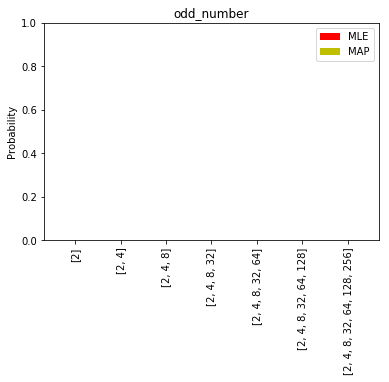

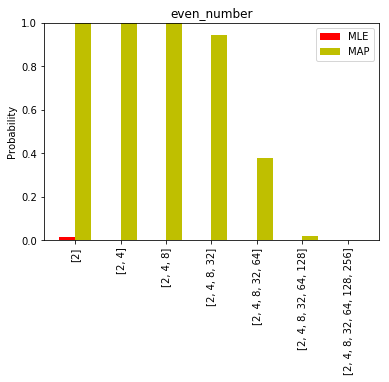

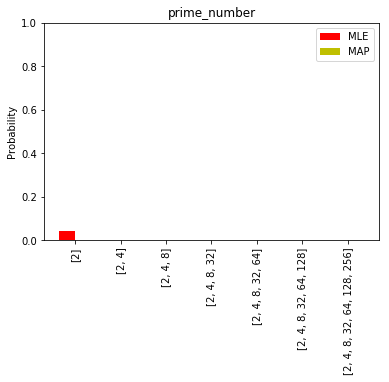

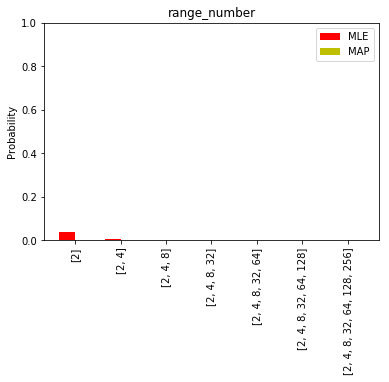

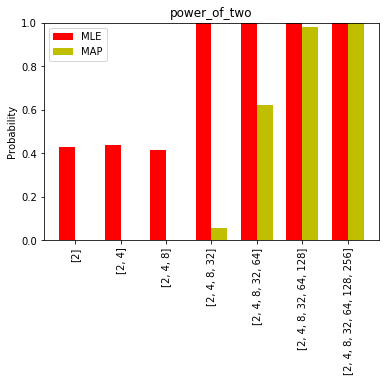

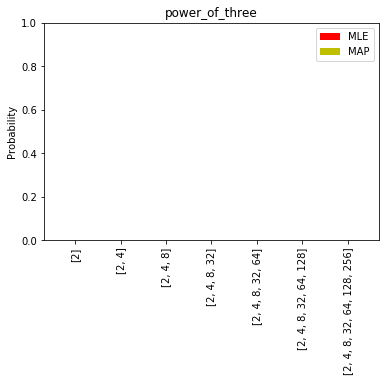

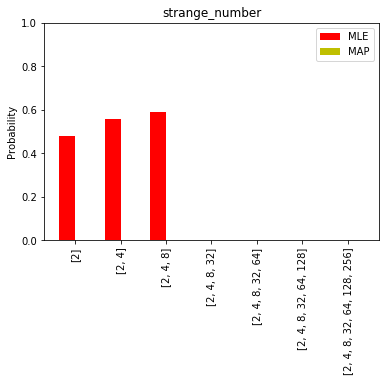

In [88]:
for index, hypothese in enumerate(hypothesis):
    fig, ax = plt.subplots()
    MLE_numbers = column(MLE, index)
    MAP_numbers = column(MAP, index)
    
    N = len(MLE_numbers)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35  
    

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Probability')
    ax.set_ylim([0,1])
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(label)
    ax.set_title(hypothese)
         # the width of the bars

    rects1 = ax.bar(ind, MLE_numbers, width, color='r')
    rects2 = ax.bar(ind + width, MAP_numbers, width, color='y')

    ax.legend((rects1[0], rects2[0]), ('MLE', 'MAP'))
    plt.xticks(rotation="vertical")
    plt.show()